In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Open and read files
flight_delay_dest = pd.read_csv("clean/LAX_Dest_Flight_Delays_2016.csv")

In [3]:
# retrive and conver in to dataframe
flight_delay_dest = pd.DataFrame(flight_delay_dest)

In [5]:
flight_delay_dest.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'UniqueCarrier', 'Carrier', 'TailNum', 'FlightNum', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateName', 'OriginWac', 'Dest',
       'DestCityName', 'DestState', 'DestStateName', 'DestWac', 'CRSDepTime',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance',
       'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'CarrierName'],
      dtype='object')

In [6]:
flight_delay_dest.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,Carrier,TailNum,FlightNum,...,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CarrierName
0,2016,1,1,1,5,2016-01-01,AA,AA,N850AA,58,...,264.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
1,2016,1,1,2,6,2016-01-02,AA,AA,N855AA,58,...,281.0,1.0,2504.0,11,0.0,0.0,0.0,24.0,8.0,American Airlines Inc.
2,2016,1,1,3,7,2016-01-03,AA,AA,N864AA,58,...,262.0,1.0,2504.0,11,30.0,0.0,0.0,0.0,6.0,American Airlines Inc.
3,2016,1,1,4,1,2016-01-04,AA,AA,N862AA,58,...,261.0,1.0,2504.0,11,1272.0,0.0,11.0,0.0,15.0,American Airlines Inc.
4,2016,1,1,5,2,2016-01-05,AA,AA,N859AA,58,...,251.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
5,2016,1,1,6,3,2016-01-06,AA,AA,N865AA,58,...,253.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
6,2016,1,1,7,4,2016-01-07,AA,AA,N861AA,58,...,287.0,1.0,2504.0,11,0.0,0.0,60.0,0.0,0.0,American Airlines Inc.
7,2016,1,1,8,5,2016-01-08,AA,AA,N857AA,58,...,281.0,1.0,2504.0,11,8.0,0.0,42.0,0.0,48.0,American Airlines Inc.
8,2016,1,1,9,6,2016-01-09,AA,AA,N863AA,58,...,284.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
9,2016,1,1,10,7,2016-01-10,AA,AA,N850AA,58,...,271.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.


In [9]:
# Total departure delayed by carrier 
table_depdelay_carrier = pd.pivot_table(flight_delay_dest, values=['DepDel15'], columns=['Carrier'], index='Month', aggfunc=np.sum)   
table_depdelay_carrier

DepDel15                                                               \
Carrier       AA     AS     B6     DL    F9    HA     NK     OO     UA     VX   
Month                                                                           
1          582.0   54.0   79.0  452.0  18.0  11.0  154.0  354.0  406.0  211.0   
2          409.0   39.0   82.0  297.0  11.0  11.0  186.0  273.0  253.0  138.0   
3          581.0   45.0   55.0  396.0  22.0  11.0  193.0  315.0  423.0  225.0   
4          479.0   42.0   61.0  369.0  26.0   5.0  181.0  181.0  348.0  211.0   
5          543.0   38.0   75.0  364.0  39.0  11.0  202.0  217.0  433.0  212.0   
6         1004.0   94.0   75.0  582.0  49.0  18.0  244.0  368.0  575.0  251.0   
7         1081.0  101.0  148.0  638.0  71.0  24.0  202.0  355.0  687.0  237.0   
8          962.0   79.0  108.0  710.0  57.0  16.0  212.0  343.0  662.0  221.0   
9          559.0   43.0   84.0  310.0  39.0  12.0  106.0  257.0  398.0  175.0   
10         581.0   62.0   80.0  319.0  26.0  19.0  112.0  306.0  504.0  202.0   
11         563.0   51.0   45.0  509.0  20.0  15.0  105.0  309.0  393.0  174.0   
12         735.0  164.0  104.0  693.0  60.0  32.0  210.0  772.0  686.0  324.0   

                 
Carrier      WN  
Month            
1         602.0  
2         377.0  
3         767.0  
4         738.0  
5         771.0  
6        1123.0  
7        1117.0  
8         818.0  
9         635.0  
10        705.0  
11        665.0  
12       1195.0

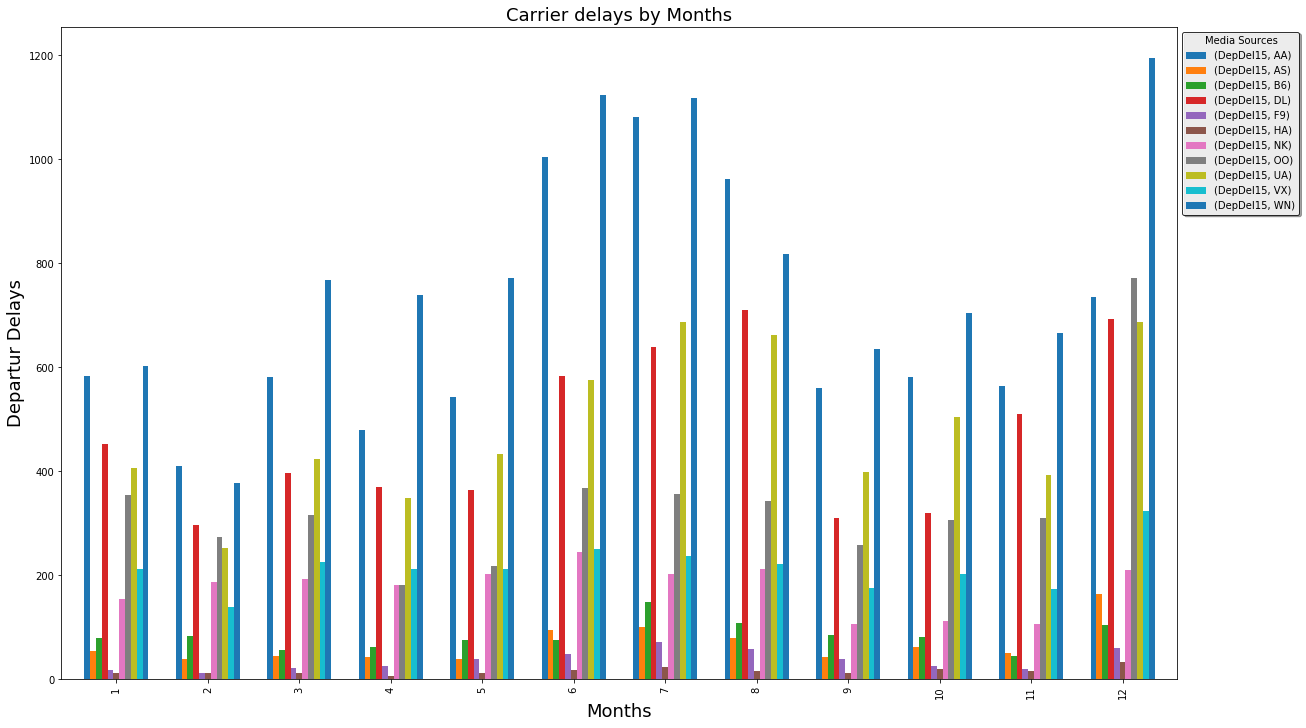

In [59]:
table_depdelay_carrier.plot(kind='bar',figsize=(20,12), width=0.7)
plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'medium', title='Media Sources', bbox_to_anchor=(1, 1))
plt.xlabel('Months',fontsize='18')
plt.ylabel('Departur Delays',fontsize='18')
plt.title('Carrier delays by Months',fontsize='18')
plt.savefig('DestFlights_Departure carrier delays by months')
plt.show()


In [7]:
# Total departure delayed by cities 
table_depdelay_city = pd.pivot_table(flight_delay_dest, values=['DepDel15'], index=['OriginCityName'], columns='Month', aggfunc=np.sum)   
table_depdelay_city

DepDel15                                     \
Month                               1      2      3      4      5      6    
OriginCityName                                                              
Albuquerque, NM                   13.0   11.0   17.0   20.0   28.0   21.0   
Anchorage, AK                      0.0    2.0    2.0    3.0    2.0    5.0   
Aspen, CO                         29.0   32.0   25.0    3.0    NaN    1.0   
Atlanta, GA                      103.0   81.0   63.0   80.0  111.0  126.0   
Austin, TX                        14.0   22.0   40.0   28.0   35.0   48.0   
Baltimore, MD                     29.0   19.0   30.0   28.0   32.0   50.0   
Bend/Redmond, OR                   NaN    NaN    NaN    NaN    NaN    1.0   
Boise, ID                         12.0    8.0   13.0    3.0    9.0    4.0   
Boston, MA                        35.0   49.0   49.0   53.0   73.0   73.0   
Bozeman, MT                        1.0    4.0    1.0    0.0    NaN    NaN   
Buffalo, NY                        NaN    NaN    NaN    NaN    NaN    4.0   
Charlotte, NC                     27.0   20.0   22.0   27.0   35.0   54.0   
Chicago, IL                      181.0  159.0  177.0  175.0  199.0  238.0   
Cincinnati, OH                     1.0    3.0    4.0   10.0   11.0    8.0   
Cleveland, OH                     15.0   18.0   13.0    8.0    9.0   18.0   
Colorado Springs, CO               7.0   12.0    9.0    8.0    8.0    8.0   
Columbus, OH                       7.0    6.0    3.0    6.0    8.0    3.0   
Dallas, TX                        52.0   13.0   50.0   48.0   55.0   65.0   
Dallas/Fort Worth, TX            124.0   66.0  144.0   99.0  113.0  206.0   
Denver, CO                        76.0   53.0  115.0   90.0  131.0  165.0   
Detroit, MI                       30.0   39.0   39.0   26.0   25.0   33.0   
Durango, CO                        NaN    NaN    NaN    NaN    NaN    0.0   
Eagle, CO                          3.0    5.0    7.0    0.0    NaN    0.0   
El Paso, TX                        8.0    3.0   19.0   19.0   21.0   28.0   
Eugene, OR                         0.0    0.0    NaN    NaN    NaN   12.0   
Fort Lauderdale, FL               67.0   39.0   48.0   29.0   40.0   38.0   
Fresno, CA                         9.0    4.0    6.0   12.0   13.0   20.0   
Hartford, CT                       NaN    NaN    NaN    NaN    NaN    1.0   
Hayden, CO                         3.0    1.0    2.0    NaN    NaN    NaN   
Hilo, HI                           3.0    2.0    4.0    2.0    2.0    3.0   
...                                ...    ...    ...    ...    ...    ...   
New York, NY                     150.0  169.0  128.0  146.0  144.0  188.0   
Newark, NJ                       112.0   76.0   76.0   83.0   92.0  158.0   
Oakland, CA                       84.0   64.0  107.0  110.0  107.0  139.0   
Oklahoma City, OK                  3.0    6.0    6.0    4.0    7.0    4.0   
Omaha, NE                          NaN    NaN    NaN    NaN    NaN    9.0   
Ontario, CA                        NaN    NaN    NaN    NaN    NaN    NaN   
Orlando, FL                       41.0   21.0   48.0   39.0   37.0   76.0   
Palm Springs, CA                   3.0    4.0    2.0    2.0    2.0    2.0   
Philadelphia, PA                  29.0   15.0   27.0   32.0   41.0   51.0   
Phoenix, AZ                       97.0   67.0   97.0   67.0  121.0  177.0   
Pittsburgh, PA                     2.0    4.0    0.0    0.0    1.0    0.0   
Portland, OR                      37.0   13.0   29.0   31.0   35.0   97.0   
Raleigh/Durham, NC                 7.0    9.0   10.0    9.0   14.0   30.0   
Reno, NV                          17.0   11.0   35.0   21.0   21.0   52.0   
Sacramento, CA                    76.0   50.0  102.0   76.0   61.0  129.0   
Salt Lake City, UT                46.0   53.0   43.0   40.0   43.0   73.0   
San Antonio, TX                   17.0   12.0   13.0   18.0   13.0   31.0   
San Diego, CA                     27.0   27.0   30.0   27.0   34.0   53.0   
San Francisco, CA         

In [18]:
# Total arrival delayed by carrier 
table_arrdelay_carrier = pd.pivot_table(flight_delay_dest, values=['ArrDel15'], index='Month', columns='Carrier', aggfunc=np.sum)   

table_arrdelay_carrier

ArrDel15                                                               \
Carrier       AA     AS     B6     DL    F9    HA     NK     OO     UA     VX   
Month                                                                           
1          611.0  101.0   66.0  577.0  18.0   3.0  164.0  444.0  274.0  182.0   
2          450.0   75.0   81.0  360.0   9.0  10.0  190.0  328.0  169.0  120.0   
3          692.0   75.0   64.0  466.0  23.0   7.0  197.0  455.0  459.0  229.0   
4          633.0   55.0   46.0  360.0  23.0  14.0  186.0  223.0  305.0  206.0   
5          654.0   72.0   63.0  479.0  37.0  10.0  211.0  281.0  460.0  235.0   
6         1397.0  169.0   85.0  751.0  50.0  52.0  249.0  498.0  658.0  367.0   
7         1252.0  110.0  172.0  699.0  75.0  53.0  213.0  428.0  751.0  334.0   
8         1161.0   79.0  125.0  786.0  53.0  30.0  217.0  451.0  803.0  316.0   
9          527.0   60.0   78.0  439.0  42.0  21.0  104.0  372.0  595.0  221.0   
10         695.0  133.0  122.0  476.0  38.0  17.0  138.0  477.0  781.0  246.0   
11         423.0  118.0   42.0  409.0  24.0  38.0  119.0  485.0  478.0  185.0   
12        1040.0  267.0  207.0  917.0  69.0  37.0  318.0  963.0  944.0  443.0   

                 
Carrier      WN  
Month            
1         692.0  
2         402.0  
3         918.0  
4         926.0  
5         995.0  
6        1354.0  
7        1307.0  
8        1107.0  
9         887.0  
10       1154.0  
11        837.0  
12       1542.0

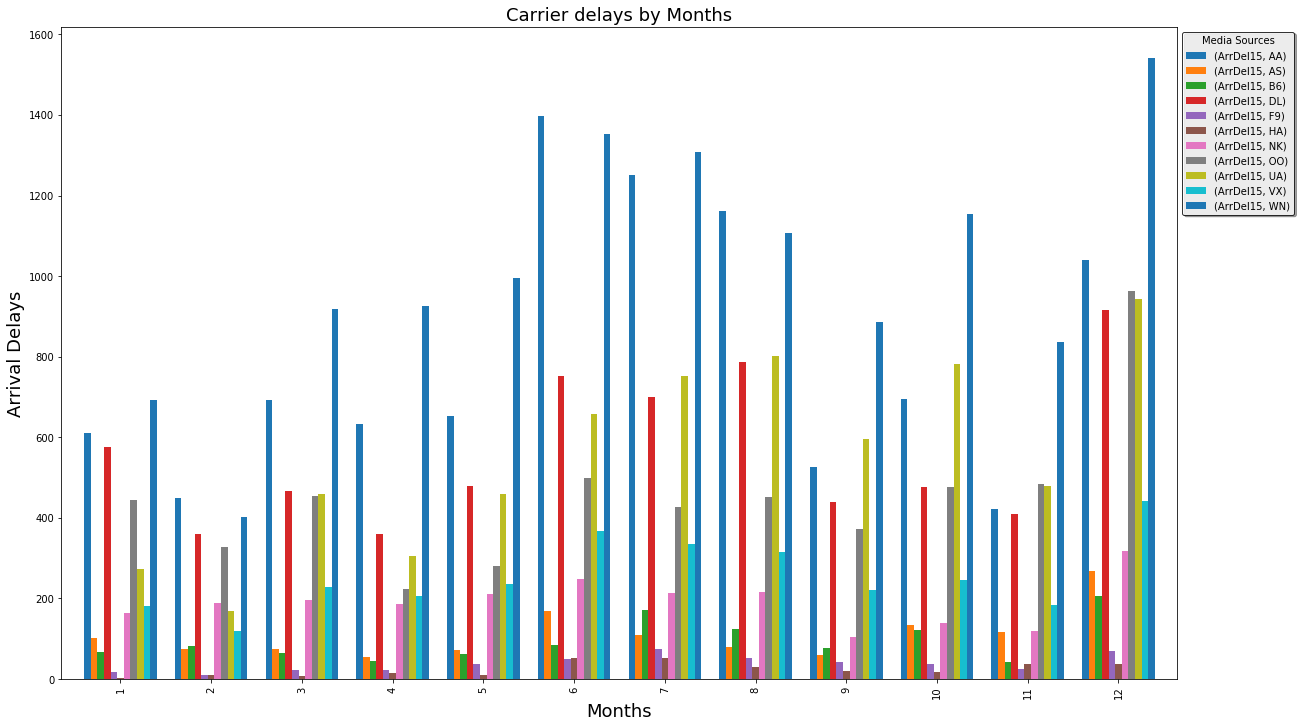

In [60]:
table_arrdelay_carrier.plot(kind='bar',figsize=(20,12), width=0.8)
plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'medium', title='Media Sources', bbox_to_anchor=(1, 1))
plt.xlabel('Months',fontsize='18')
plt.ylabel('Arrival Delays',fontsize='18')
plt.title('Carrier delays by Months',fontsize='18')
plt.savefig('DestFlights_Arrival carrier delays by months')
plt.show()

In [10]:
# # Total Arrival delayed by cities 
table_depdelay_city = pd.pivot_table(flight_delay_dest, values=['ArrDel15'], columns=['OriginCityName'], index=flight_delay_dest.Month, aggfunc=np.sum)   
table_depdelay_city

ArrDel15                                                 \
OriginCityName Albuquerque, NM Anchorage, AK Aspen, CO Atlanta, GA Austin, TX   
Month                                                                           
1                         16.0           3.0      32.0        72.0       21.0   
2                         13.0           3.0      28.0        52.0       23.0   
3                         16.0           4.0      40.0        68.0       41.0   
4                         24.0           3.0       5.0        77.0       31.0   
5                         30.0           4.0       NaN       106.0       35.0   
6                         26.0           9.0       3.0       127.0       63.0   
7                         24.0           2.0      15.0       130.0       54.0   
8                         14.0           6.0      12.0       149.0       60.0   
9                         19.0           0.0       6.0        74.0       43.0   
10                        31.0           2.0      11.0        86.0       42.0   
11                        18.0           5.0       0.0        85.0       29.0   
12                        41.0           6.0      56.0       210.0       57.0   

                                                                    \
OriginCityName Baltimore, MD Bend/Redmond, OR Boise, ID Boston, MA   
Month                                                                
1                       18.0              NaN      11.0       28.0   
2                       21.0              NaN       7.0       41.0   
3                       26.0              NaN      13.0       58.0   
4                       27.0              NaN       5.0       46.0   
5                       32.0              NaN      10.0       58.0   
6                       47.0             10.0       5.0       99.0   
7                       54.0              3.0       7.0      141.0   
8                       41.0              4.0      10.0      119.0   
9                       30.0              6.0       7.0       75.0   
10                      31.0             12.0      14.0      107.0   
11                      16.0              8.0       8.0       40.0   
12                      84.0             21.0      48.0      152.0   

                                ...                            \
OriginCityName Bozeman, MT      ...       San Luis Obispo, CA   
Month                           ...                             
1                      1.0      ...                      16.0   
2                      4.0      ...                       9.0   
3                      5.0      ...                      25.0   
4                      0.0      ...                      19.0   
5                      NaN      ...                      19.0   
6                      NaN      ...                      22.0   
7                      4.0      ...                      10.0   
8                      1.0      ...                      13.0   
9                      4.0      ...                      16.0   
10                     0.0      ...                      21.0   
11                     NaN      ...                      33.0   
12                    12.0      ...                      55.0   

                                                                        \
OriginCityName Santa Barbara, CA Seattle, WA Spokane, WA St. Louis, MO   
Month                                                                    
1                           17.0       127.0         7.0          16.0   
2                           12.0        82.0         4.0          14.0   
3                           21.0        98.0         4.0          23.0   
4                           17.0       102.0         0.0          14.0   
5                           17.0       119.0         NaN          25.0   
6                           18.0       282.0         1.0          38.0   
7                           14.0       206.0         1.0          46.0   
8                           26.0       

#### What time of day are delays happening?

In [12]:
flight_delay_dest.dtypes

Year                      int64
Quarter                   int64
Month                     int64
DayofMonth                int64
DayOfWeek                 int64
FlightDate               object
UniqueCarrier            object
Carrier                  object
TailNum                  object
FlightNum                 int64
Origin                   object
OriginCityName           object
OriginState              object
OriginStateName          object
OriginWac                 int64
Dest                     object
DestCityName             object
DestState                object
DestStateName            object
DestWac                   int64
CRSDepTime                int64
DepTime                 float64
DepDelay                float64
DepDelayMinutes         float64
DepDel15                float64
DepartureDelayGroups    float64
DepTimeBlk               object
TaxiOut                 float64
WheelsOff               float64
WheelsOn                float64
TaxiIn                  float64
CRSArrTi

In [13]:
df_deptime = flight_delay_dest[['DepTime','Carrier','DepDel15']]
df_deptime = pd.DataFrame(df_deptime)
df_deptime.head()


,DepTime,Carrier,DepDel15
0,1426.0,AA,0.0
1,1502.0,AA,1.0
2,1513.0,AA,1.0
3,1155.0,AA,1.0
4,1509.0,AA,1.0


In [15]:
delay_times = df_deptime.copy()

time_bin = np.array(['Early Morning(00:01am to 5:59am)','Morning(6:00am to 11:59am)','Noon(12:00pm to 5:59pm)', 'Evening(6:00pm to 23:59pm)'])
delay_times['Departure_Times'] = pd.cut(delay_times['DepTime'],[1.0, 600.0, 1200.0, 1800.0, 2400.0], labels=time_bin)


In [29]:
df = delay_times.groupby('Departure_Times')['DepDel15','Carrier'].sum()
df.reset_index()

,Departure_Times,DepDel15
0,Early Morning(00:01am to 5:59am),594.0
1,Morning(6:00am to 11:59am),8274.0
2,Noon(12:00pm to 5:59pm),14320.0
3,Evening(6:00pm to 23:59pm),16973.0


In [30]:
df['DepDel15'].sum()


40161.0

In [31]:
df.dtypes

DepDel15    float64
dtype: object

In [53]:
df.plot(kind='bar',figsize=(10,5))

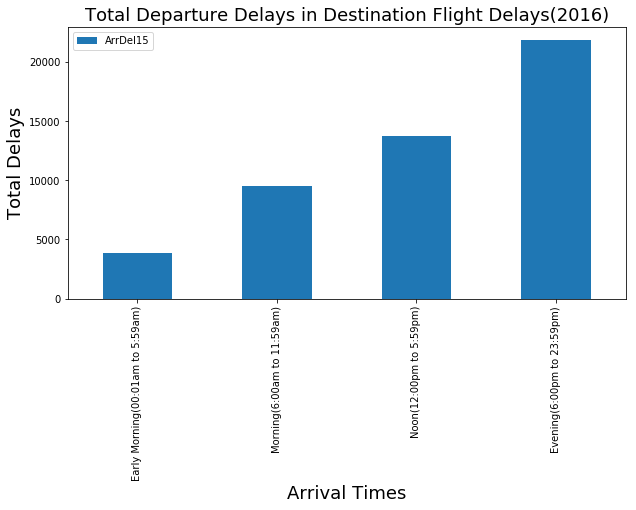

In [54]:
plt.xlabel('Arrival Times',fontsize='18')
plt.ylabel('Total Delays',fontsize='18')
plt.title('Total Departure Delays in Destination Flight Delays(2016)',fontsize='18')
plt.savefig('DestFlights_Departure delays during day')
plt.show()

In [32]:
df_arrtime = flight_delay_dest[['ArrTime','Carrier','ArrDel15']]
df_arrtime = pd.DataFrame(df_arrtime)
df_arrtime.head()


,ArrTime,Carrier,ArrDel15
0,2116.0,AA,0.0
1,2211.0,AA,1.0
2,2215.0,AA,1.0
3,1917.0,AA,1.0
4,2143.0,AA,0.0


In [39]:
delay_arr_times = df_arrtime.copy()

time_bin = np.array(['Early Morning(00:01am to 5:59am)','Morning(6:00am to 11:59am)','Noon(12:00pm to 5:59pm)', 'Evening(6:00pm to 23:59pm)'])
delay_arr_times['Arrival_Times'] = pd.cut(delay_arr_times['ArrTime'],[1.0, 600.0, 1200.0, 1800.0, 2400.0], labels=time_bin)


In [42]:
df3 = delay_arr_times.groupby('Arrival_Times')['ArrDel15','Carrier'].sum()
df3.reset_index()

,Arrival_Times,ArrDel15
0,Early Morning(00:01am to 5:59am),3848.0
1,Morning(6:00am to 11:59am),9481.0
2,Noon(12:00pm to 5:59pm),13785.0
3,Evening(6:00pm to 23:59pm),21887.0


In [45]:
df3['ArrDel15'].sum()

49001.0

In [62]:
df3.plot(kind='bar',figsize=(10,5))

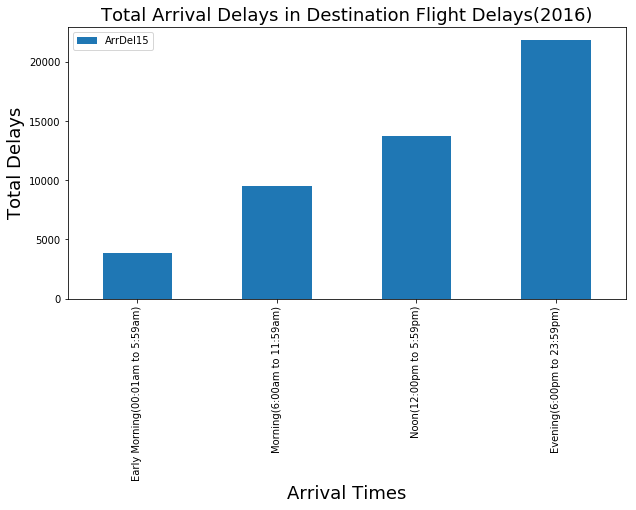

In [63]:
plt.xlabel('Arrival Times',fontsize='18')
plt.ylabel('Total Delays',fontsize='18')
plt.title('Total Arrival Delays in Destination Flight Delays(2016)',fontsize='18')
plt.savefig('DestFlights_Arrival delays during day')
plt.show()